**Ridge regression with Ordinary Least Squares**

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y = True)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
class MyRidge:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train, y_train):
        m = X_train.shape[1]

        X_train = np.insert(X_train, 0, 1, axis=1)
        I = np.identity(m+1)
        I[0][0] = 0 # don't apply regula on b0

        betas = np.linalg.inv(X_train.T @ X_train + self.alpha * I)
        betas = betas @ X_train.T @ y_train

        self.coef_ = betas[1:]
        self.intercept_ = betas[0]

    def predict(self, X_test):
        y_preds = X_test @ self.coef_ + self.intercept_
        return y_preds

In [6]:
model = MyRidge()

In [7]:
model.fit(X_train, y_train)

In [8]:
preds = model.predict(X_test)

In [9]:
preds

array([143.86448103, 177.60673096, 143.03578027, 286.63301597,
       125.61640769,  99.75491074, 250.40068384, 189.41436942,
        89.17543131, 115.70368508,  98.53757845, 157.66290287,
        67.5785422 , 205.43931752, 104.35686174, 133.96213954,
       220.15300908, 243.13423921, 191.4543613 , 211.76673001,
       200.99011964,  92.70280503,  77.25581122, 187.3944766 ,
       154.33176476, 163.00948167, 187.22637182, 175.69037816,
        54.57454328, 116.55257444, 178.97163164,  95.3999277 ,
       133.76502749, 180.47075068, 173.08119258, 189.49672058,
       126.27903561, 123.22673789, 150.36862935,  65.10316731,
        81.21214289, 112.0518947 , 159.83741927, 152.73855063,
       173.72838507,  69.7255299 ,  82.98220245, 107.31968241,
        63.66141919, 157.37959813, 153.28244489,  69.12659215,
       118.04187691, 110.52281333, 170.9006869 , 156.3551143 ,
        99.43437595, 202.84270164, 117.87529572,  71.38280493,
       183.68982616, 196.48751431, 141.25634819, 110.68

In [10]:
model.coef_

array([  42.85566976, -205.49431899,  505.08903304,  317.0932049 ,
       -108.50026183,  -86.23673333, -190.36318008,  151.70708637,
        392.28931896,   79.9081772 ])

In [11]:
model.intercept_

151.45857456679605

**Ridge regression with Gradient Descent**

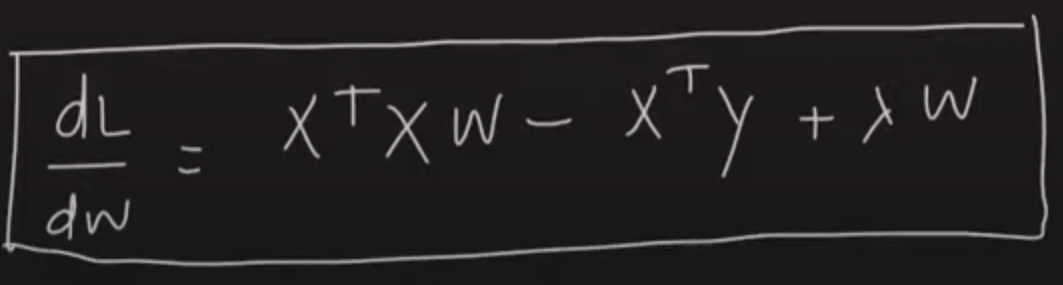

In [19]:
class RidgeRegression:
    def __init__(self, lr=0.01, epochs=50, alpha=0.1):
        self.lr = lr
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0

        theta = np.insert(self.coef_, 0, self.intercept_)

        X_train = np.insert(X_train, 0, 1, axis=1)

        for i in range(self.epochs):
            # bgd
            theta_der = (X_train.T @ X_train) @ theta - X_train.T @ y_train + self.alpha * theta
            theta -= self.lr * theta_der
        
        self.coef_ = theta[1:]
        self.intercept_ = theta[0]
    
    def predict(self, X_test):
        return X_test @ self.coef_ + self.intercept_

In [32]:
model = RidgeRegression(0.001, 100, 0.001)
model.fit(X_train, y_train)

In [33]:
p = model.predict(X_test)

In [34]:
r2_score(y_test, p)

0.1806679243838849

**Choosing value of $\lambda$**

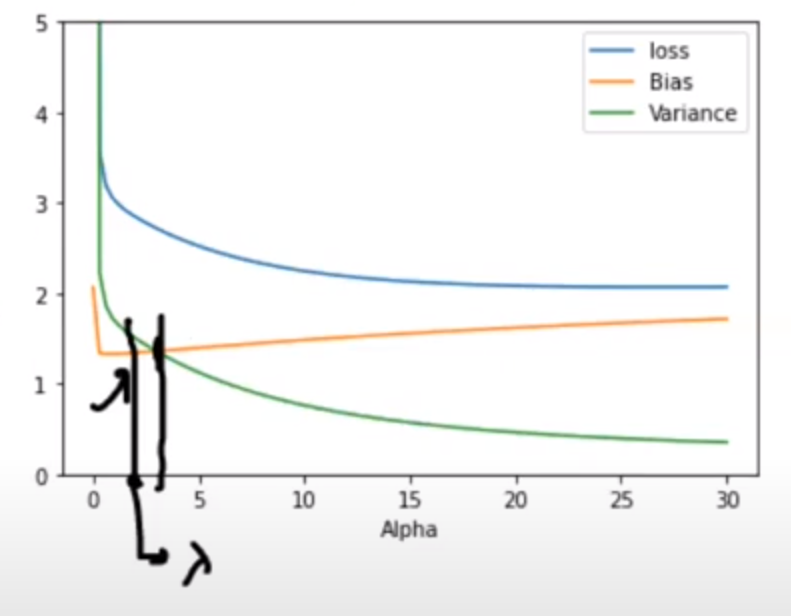